# 가설검정

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, statistics]

`-` 대표적인 확률분포에 대한 간단한 정리를 마친 후 작성할 예정임 ---> 시작

`-` 참고: Statistics: Unlocking the power of data, Robin Lock 외 4인

# 중심극한정리(central limit theorem)

`-` 동일한 확률분포를 가진 독립확률변수 $n$개의 평균의 분포는 충분히 크다면($n\geq 30$이면) 정규분포에 가까워짐

`-` 앞으로 많은 가설검정에서 사용될 예정

`-` 나중에 증명 추가 

# 평균에 대한 추론 
`-` 양적 자료에서 관심 있는 모수는 종종 모집단 평균 $\mu$이다

`-` ex) 우리나라 사람들의 평균 맥박수가 어느정도 되는지 궁금함 ---> 평균에 대한 가설검증

## 표본 평균에 대한 중심극한정리 
`-` 평균이 $\mu$이고 표준편차가 $\alpha$인 모집단에서 표본 크기 $n$이 충분히 클 때 표본 평균의 분포는 근사적으로 평균이 $\mu$이고 표준편차는 $\frac{\alpha}{\sqrt{n}}$인 정규분포를 따름

`-` 하지만 위의 내용을 그대로 사용할 수 없음

1. 모집단의 표준편차 $\alpha$를 모른다 ---> 표본의 표준편차 $s$를 $\alpha$대신 사용

2. 추정된 표준오차 $\frac{s}{\sqrt{n}}$에 기반하여 표준화한 통계량의 분포는 표준정규분포를 따르지 않음 ---> t 분포를 따름([t 분포 참고](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%8A%9C%EB%8D%98%ED%8A%B8_t_%EB%B6%84%ED%8F%AC))

## 표본의 표준편차를 사용할 때 표본 평균의 분포 
`-` 평균이 $\mu$인 모집단에서 표본 크기 $n$인 무작위 표본을 뽑을 때 표본 평균의 분포는 중심이 $\mu$이고 표준편차는 $\frac{s}{\sqrt{n}}$으로 추정

`-` 표본 평균을 표준화하면 자유도 $n-1$인 t 분포를 근사적으로 따름

`-` 표본 크기 $n$이 커질수록 t분포는 표준정규분포와 가까워짐

In [1]:
import scipy as sp

In [2]:
import scipy.stats

In [3]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

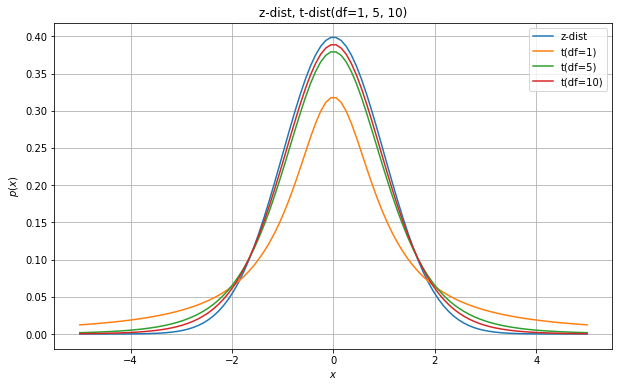

In [9]:
x = np.linspace(-5, 5, 100)

rv_norm = sp.stats.norm(loc=0, scale=1)
rv_t10 = sp.stats.t(df=10)
rv_t5 = sp.stats.t(df=5)
rv_t1 = sp.stats.t(df=1)

norm_pdf = rv_norm.pdf(x)
t10_pdf = rv_t10.pdf(x)
t5_pdf = rv_t5.pdf(x)
t1_pdf = rv_t1.pdf(x)

legend = ['z-dist', 't(df=1)', 't(df=5)', 't(df=10)']

plt.figure(figsize = (10, 6)) 
plt.plot(x, norm_pdf)
plt.plot(x, t1_pdf)
plt.plot(x, t5_pdf)
plt.plot(x, t10_pdf)

plt.title("z-dist, t-dist(df=1, 5, 10)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid()
plt.legend(legend)
plt.show()

`-` 위의 plot을 보면 자유도가 커질수록 t분포가 표준정규분포에 가까워짐을 알 수 있음

`-` 나중에 plot그리는데 사용되는 lib와 사용법 추가 예정

In [1]:
import rpy2

In [1]:
import os

In [2]:
os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' ## R.HOME 에서 복사한 경로

In [3]:
%load_ext rpy2.ipython

C:\anaconda3\envs\py38r40\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [5]:
%%R
x=c(1,2)
x

[1] 1 2


## t 분포 사용 조건 

`-` 표본 크기 $n\geq30$이면 문제 없음

`-` 만약 표본 크기 $n$이 작다면? ---> 모집단이 정규분포를 따라야 함

`-` 근데 모집단이 정규분포 따르는지 모른다 ---> 대신에 표본이 정규분포를 따르는지 확인하자 

`-` 표본에 이상점이 있거나 비대칭이면 t 분포 사용$\times$ 

`-` 표본이 정규분포를 따르는 것 같다 ---> $\bar{x}$의 분포는 정규분포를 따른다 ---> t-test 실시해도 괜찮다

## 평균에 대한 t검정 

`-` 영가설 $H_0:\mu=\mu_0$를 검정하는 t-통계량은 다음과 같음

`-` $t=\frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}$

`-` $\bar{x}$는 표본 평균, $s$는 표본에서 계산한 표준편차

`-` p-값을 통해 영가설을 기각할지 기각하지 못하는지를 결정 ---> 가설검정 용어(영가설, p-값 등등)에 대해 나중에 정리 예정

`-` 검증의 p-값은 자유도가 $n-1$인 t분포에서 대안가설에 적절한 꼬리쪽의 비율을 계산

## 평균에 대한 t검정 예제 

- 문제

`-` 사람의 평균 체온이 $36.5^{°}\mathrm{C}$인지 검정하기 위해 건강한 사람 50명의 체온을 재었다

`-` $\bar{x} = 36.2,\;s=0.5$이다

`-` 위의 데이터는 사람의 평균이 체온이 $36.5^{°}\mathrm{C}$와는 다르다는 증거인지 검정하자

- 해결 과정

`-` $H_0:\mu=36.5,\;H_a:\mu\neq36.5$  

- numpy로 평균이 36.5, 표준편차가 0.5인 데이터 50개를 난수추출하고 이를 점도표로 그리자